In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import thinkstats2
import thinkplot

Here we are reading the dataset in jupyter notebook.
ISO-8859-1 here converts the only the invoice data.

In [2]:
df = pd.read_csv("data.csv",encoding = 'ISO-8859-1') 

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [5]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
cust_id         406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [10]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df_new = df.dropna()

In [12]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoice_num     406829 non-null object
stock_code      406829 non-null object
description     406829 non-null object
quantity        406829 non-null int64
invoice_date    406829 non-null datetime64[ns]
unit_price      406829 non-null float64
cust_id         406829 non-null float64
country         406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


By understanding the data in a more descriptive manner, we notice two things:

Quantity has negative values

Unit Price has zero values

In [15]:
order_canceled = df['invoice_num'].apply(lambda x:int('C' in x))
n1 = order_canceled.sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/541909 (1.71%) 


# Remove Quantity with negative values



In [16]:
df_new = df_new[df_new.quantity > 0]

In [17]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## Add the column - amount_spent

To calculate the total money spent on each purchase, we simply multiply Quantity with Unit Price:

amount_spent = quantity * unit_price

In [18]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [19]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

# Add the columns - Month, Day and Hour for the invoice

In [20]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

Finally, we add a few columns that consist of the Year_Month, Month, Day and Hour for each transaction for analysis later. The final dataframe will look like this:

In [21]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


# Exploratory Data Analysis (EDA)

How many orders made by the customers?

In [22]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


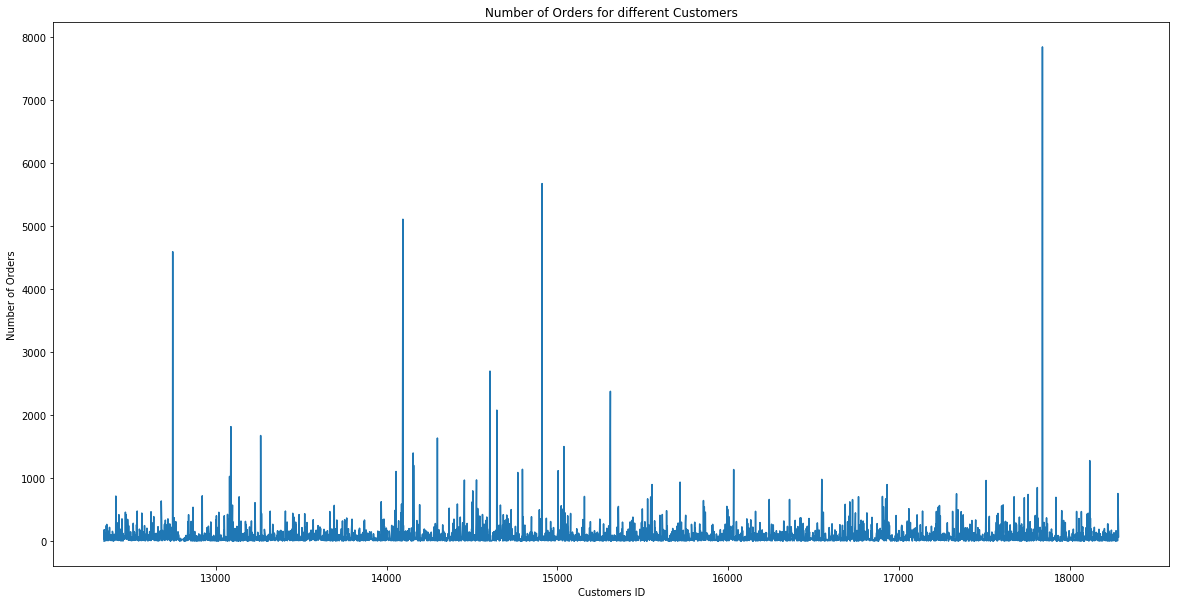

In [23]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(20,10))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [24]:
orders.invoice_num.max()

7847

Check TOP 5 most number of orders

In [25]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


How much money spent by the customers

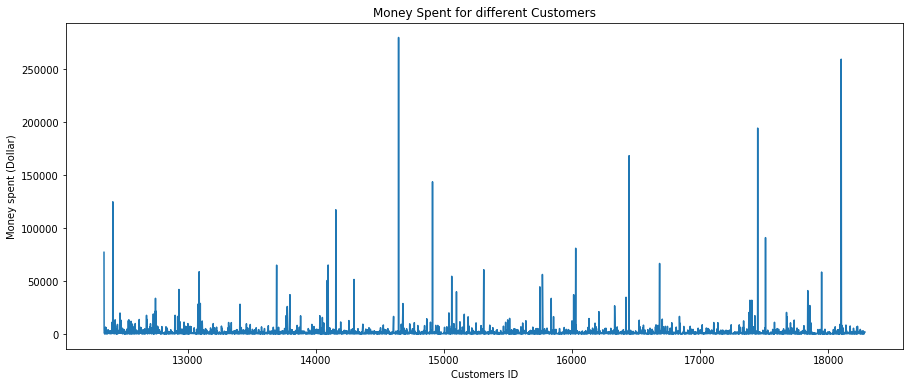

In [26]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [27]:
print('The TOP 5 customers with highest money spent...')
money_spent=money_spent.sort_values(by='amount_spent', ascending=False)
money_spent.head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


From the results we observe that most orders are made in the UK and customers from Netherlands spend the highest amount of money in their purchases.

# How many orders (per month)?

In [28]:
df1=df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()
df1

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

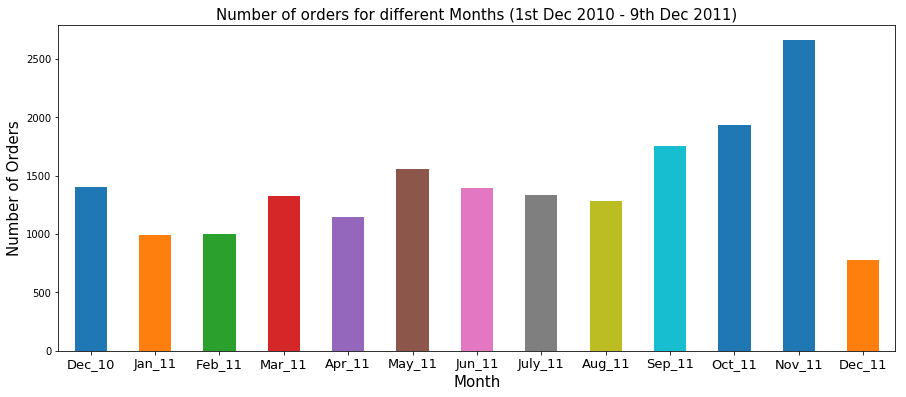

In [29]:
ax = df1.plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

Overall, we consider that the company receives the highest number of orders in November 2011 since we do not have the full month of data for December 2011.

# How many orders (per day)?

In [30]:
df2=df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()
df2

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

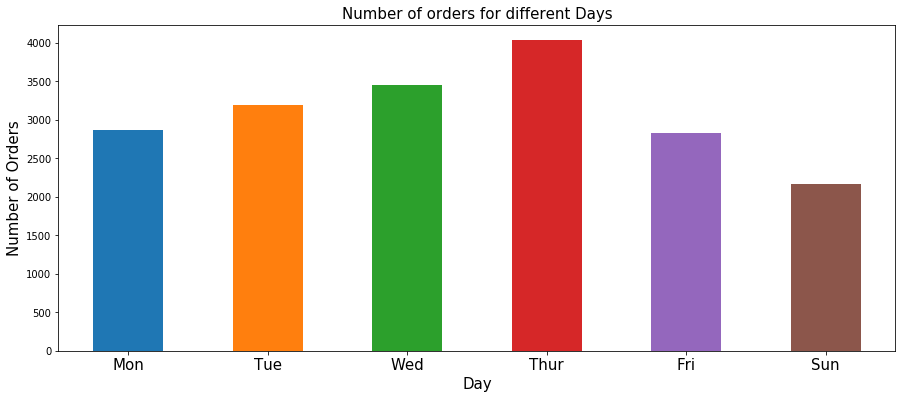

In [31]:
ax = df2.plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

Surprisingly, there are no transactions on Saturday throughout the whole period ( 1st Dec 2010–9th Dec 2011).We also spot a trend where the number of orders received by the company tends to increases from Monday to Thursday and decrease afterward.

# How many orders (per hour)?

In [32]:
df3=df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()
df3

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

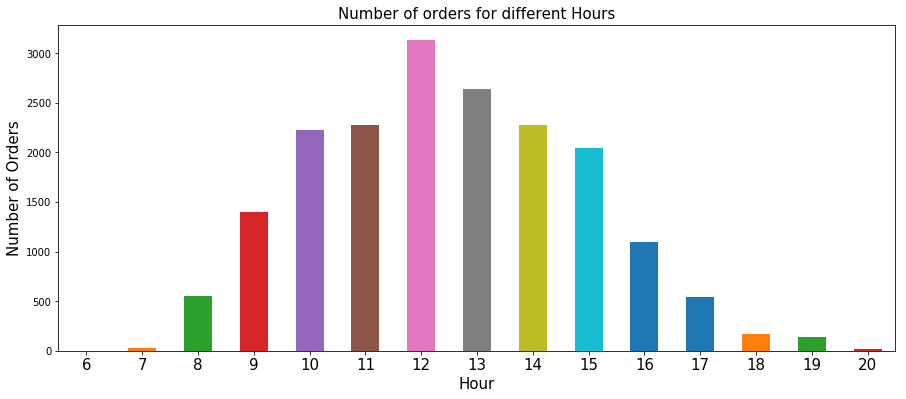

In [33]:
ax = df3.plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

In terms of hours, there are no transactions after 8:00pm until the next day at 6:00am.
Besides, we notice that the company receives the highest number of orders at 12:00pm. One of the reasons could be due to the fact that most customers make purchases during lunch hour between 12:00pm — 2:00pm.

# Discover patterns for Unit Price


In [34]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

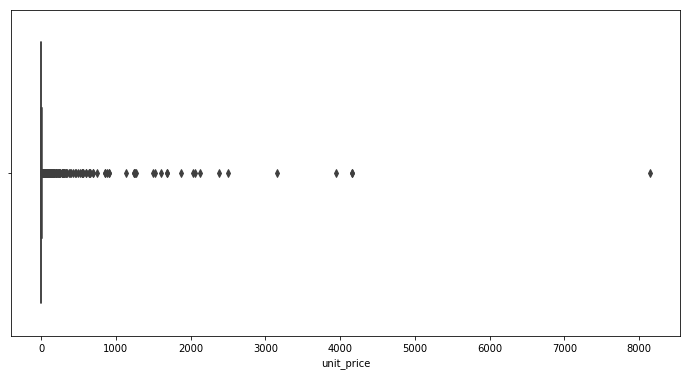

In [35]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

We observe that 75% of the data has unit price of less than 3.75 dollars — which indicates most products are relatively cheap. Only minority of them has high prices per unit 

# Well… FREE items for purchase? YES, maybe…

In [36]:
df_free = df_new[df_new.unit_price == 0]

In [37]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,0.0,12647.0,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,0.0,16560.0,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,REGENCY CAKESTAND 3 TIER,10,0.0,0.0,14911.0,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,PAPER BUNTING RETROSPOT,24,0.0,0.0,13081.0,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,PLASTERS IN TIN SKULLS,24,0.0,0.0,13081.0,United Kingdom


In [38]:
df4=df_free.year_month.value_counts().sort_index()
df4

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

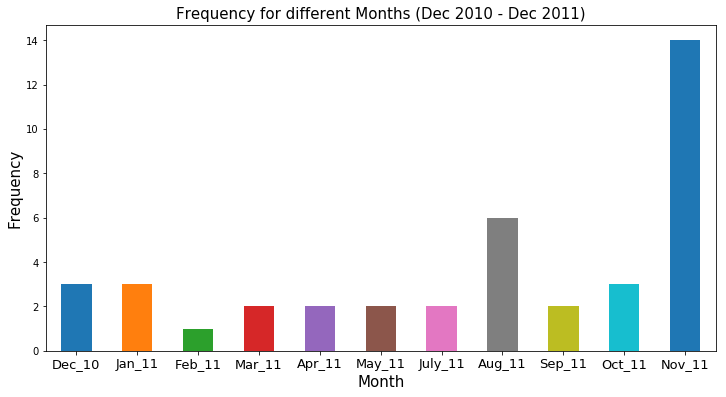

In [39]:
ax = df4.plot('bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

From the plot, the company tends to give out FREE items for purchases occasionally each month (except June 2011).

# How many orders for each country?


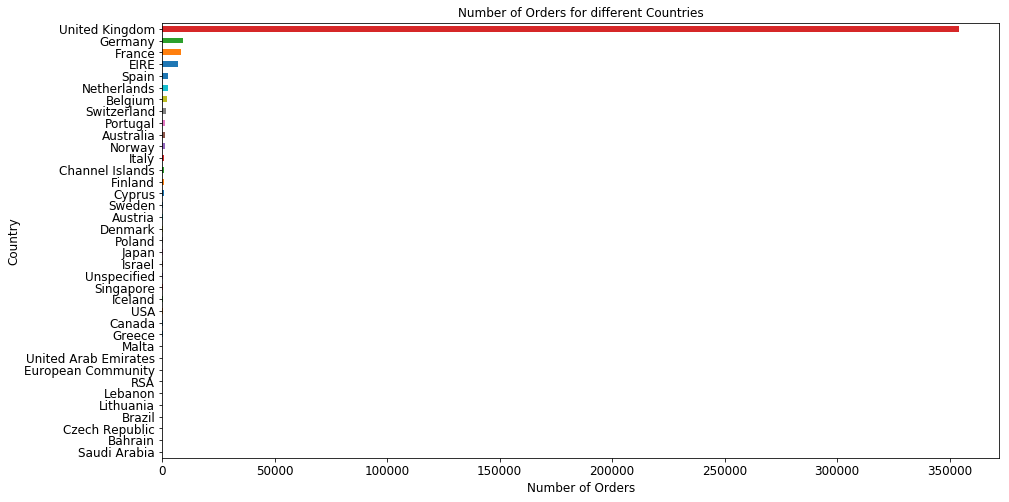

In [40]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

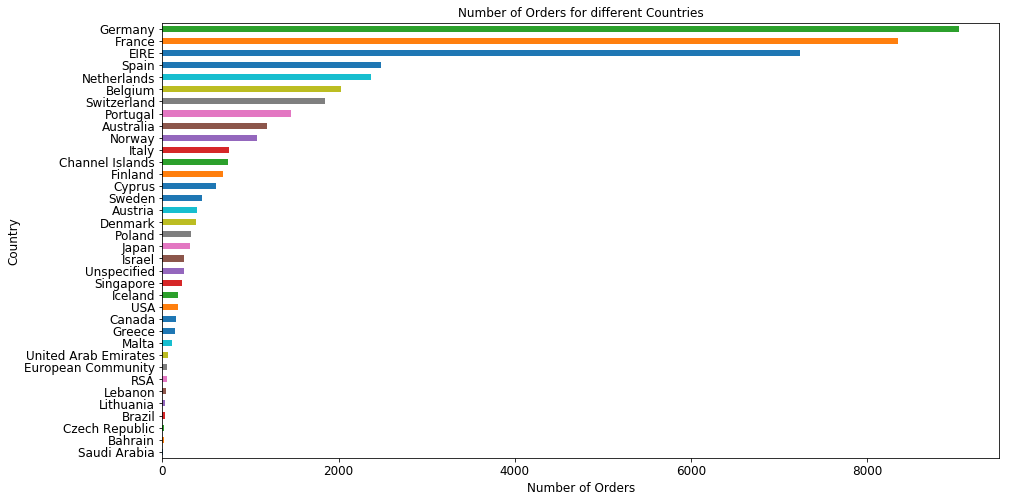

In [41]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()


As expected, the company receives the highest number of orders in the UK

# How much money spent by each country?

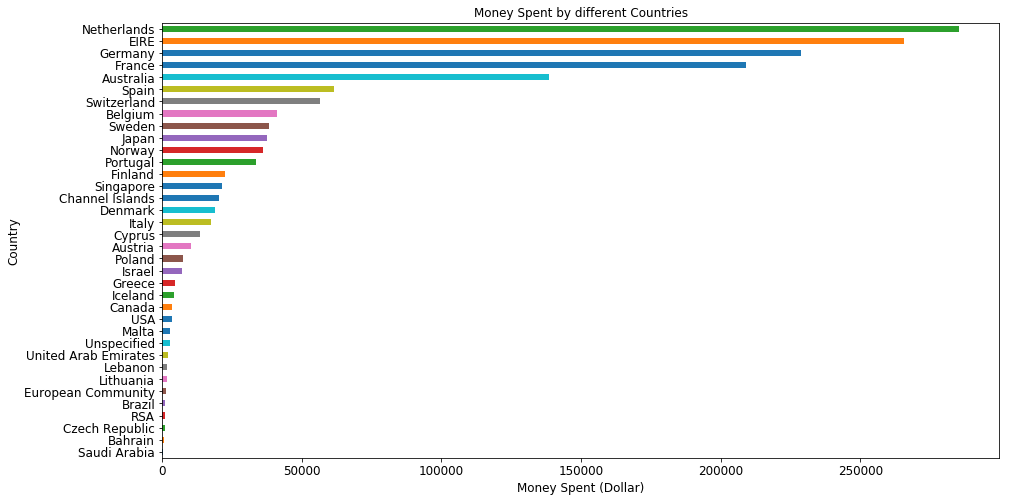

In [42]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

As the company receives the highest number of orders from customers in the UK, it is natural to see that customers in the UK spend the most on their purchases.

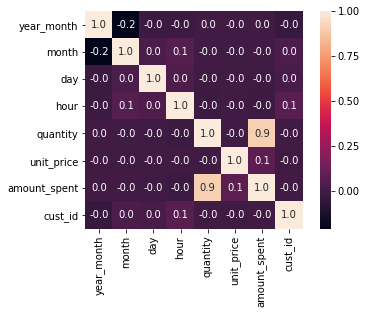

In [80]:
sns.heatmap(df_new.corr(),square=True,annot=True,fmt='.1f')

# Probability density function

In [85]:
df_spent=df_new['amount_spent']
mean,std=df_spent.mean(),df_spent.std()
mean, std

(22.39474850474768, 309.05558838012377)

In [86]:
print("Skewness: %f" % df_new['amount_spent'].skew())

Skewness: 451.465538


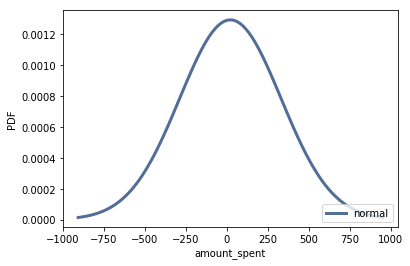

In [95]:
pdf = thinkstats2.NormalPdf(mean, std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='amount_spent', ylabel='PDF')


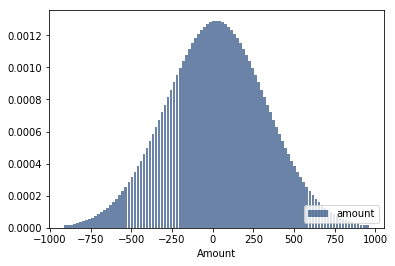

In [84]:
hist = thinkstats2.Hist(pdf, label='amount')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Amount', ylabeal='Count')

# confidence interval

In [43]:
from sklearn.utils import resample

In [44]:
amount_spent=df_new[['amount_spent']]
amount_spent

,amount_spent
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
5,15.30
6,25.50
7,11.10
8,11.10
9,54.08


In [45]:
means = []

i=0

#confidence interval shrinks with more samples
while i<1000:
    means.append(resample(amount_spent, replace=True, n_samples=len(amount_spent)).mean())
    i+=1

In [46]:
df_means = pd.DataFrame(means)

In [47]:
df_means

,amount_spent
0,22.083866
1,22.155141
2,21.727526
3,22.560527
4,22.676006
5,22.438142
6,22.812894
7,22.028969
8,22.291157
9,22.248687


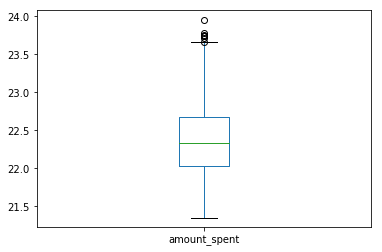

In [48]:
df_means.plot.box()

In [49]:
confidence_interval = df_means.quantile([0.05 - 0.025, 0.95 + 0.025])

In [50]:
confidence_interval

,amount_spent
0.025,21.642029
0.975,23.438036


In [51]:
lower_interval = confidence_interval.iloc[0,0]
upper_interval = confidence_interval.iloc[1,0]

print(lower_interval, upper_interval)

21.64202863870741 23.43803561434591


In [52]:
amount_spent.mean()

amount_spent    22.394749
dtype: float64

In [53]:
if amount_spent.mean().iloc[0] >= lower_interval and amount_spent.mean().iloc[0] <= upper_interval:
    print('The true mean {} is between the confidence interval of {} and {}'.format(amount_spent.mean().iloc[0], confidence_interval.iloc[0,0], confidence_interval.iloc[1,0]))

The true mean 22.39474850474768 is between the confidence interval of 21.64202863870741 and 23.43803561434591


C:\Users\Aarushi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


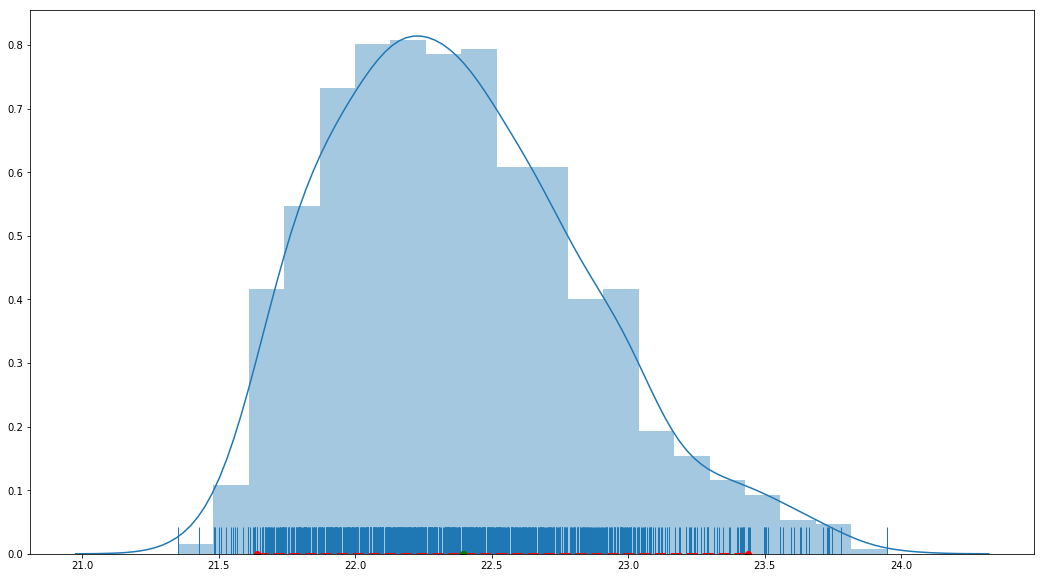

In [54]:
fig, ax = plt.subplots(figsize=(18,10)) # figsize in inches
sns.distplot(df_means, rug=True)
#sns.boxplot(data=df_means, orient="h", notch=True)

#wierd
x1 = [lower_interval, upper_interval]
x2 = [0.0, 0.0]    

ax.plot(x1, x2, 'red', linestyle='--', marker='o', lw=3)


y1 = [amount_spent.mean().iloc[0], amount_spent.mean().iloc[0]]
y2 = [0.0, 0.0]


ax.plot(y1, y2, 'green', linestyle='--', marker='o', lw=3)

How many means are within the confidence interval?

In [55]:
df_means['isInInterval'] = df_means['amount_spent'].apply(lambda x : x >= lower_interval and x <= upper_interval)

In [56]:
df_means

,amount_spent,isInInterval
0,22.083866,True
1,22.155141,True
2,21.727526,True
3,22.560527,True
4,22.676006,True
5,22.438142,True
6,22.812894,True
7,22.028969,True
8,22.291157,True
9,22.248687,True


In [57]:
(sum(df_means['isInInterval']) / len(df_means))*100

95.0

Now we add column of money_spent whether the customer is spending high,adequate or less money- 

In [58]:
def amount(param):
    if param <=21:
        return 'less'
    elif param >21 and param <=23:
        return 'adequate'
    elif param >23:
        return 'more'
    
df_new['money_spent'] = df_new['amount_spent'].apply(amount)

In [59]:
df_new

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,money_spent
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom,less
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom,less
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom,adequate
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom,less
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom,less
5,536365,2010-12-01 08:26:00,201012,12,3,8,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,15.30,17850.0,United Kingdom,less
6,536365,2010-12-01 08:26:00,201012,12,3,8,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,25.50,17850.0,United Kingdom,more
7,536366,2010-12-01 08:28:00,201012,12,3,8,22633,HAND WARMER UNION JACK,6,1.85,11.10,17850.0,United Kingdom,less
8,536366,2010-12-01 08:28:00,201012,12,3,8,22632,HAND WARMER RED POLKA DOT,6,1.85,11.10,17850.0,United Kingdom,less
9,536367,2010-12-01 08:34:00,201012,12,3,8,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,13047.0,United Kingdom,more


In [60]:
df1=df_new[['amount_spent','money_spent']]
df1.head()

,amount_spent,money_spent
0,15.30,less
1,20.34,less
2,22.00,adequate
3,20.34,less
4,20.34,less


In [61]:
count = df1.groupby(['money_spent']).count()

In [62]:
count

,amount_spent
money_spent,
adequate,2676
less,322336
more,72912


# Chi Square test of independence

Our hypotheses will be:

 H0:There is a relationship between 2 categorical variables(country and money_spent)
 
 H1:There is no relationship between 2 categorical variables(country and money_spent)


In [64]:
contingency_table=pd.crosstab(df_new['country'],df_new["money_spent"])
print('contingency_table :-\n',contingency_table.head(3))

contingency_table :-
 money_spent  adequate  less  more
country                          
Australia           3   371   811
Austria             2   297    99
Bahrain             0     8     9


In [65]:
Observed_Values = contingency_table.head(3).values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[  3 371 811]
 [  2 297  99]
 [  0   8   9]]


In [66]:
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table.head(3))
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[3.70312500e+00 5.00662500e+02 6.80634375e+02]
 [1.24375000e+00 1.68155000e+02 2.28601250e+02]
 [5.31250000e-02 7.18250000e+00 9.76437500e+00]]


In [67]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:3])
degree=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",degree)


Degree of Freedom:- 4


In [68]:
#Significance Level 5%
alpha=0.05

In [69]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 133.04433414817888


In [70]:
critical_value=chi2.ppf(q=1-alpha,df=degree)
print('critical_value:',critical_value)

critical_value: 9.487729036781154


In [71]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=degree)
print('p-value:',p_value)

p-value: 0.0


In [72]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',degree)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 133.04433414817888
critical_value: 9.487729036781154
p-value: 0.0


In [73]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
